# <center>Centro Universitário Facens<br/></center>
<br/>
<font size="4"><center><b>Disciplina: Processamento de imagens</b></center></font>
  
<font size="3"><center>Prof. Renato M. Silva</center></font>
<br/>
<br/>

## Exercícios práticos

Obs: siga boas práticas de programação:
- dar nomes intuitivos para as variáveis
- dar nomes intuitivos para as funções

----
## Exercício 1
Faça uma função que receba como parâmetros a quantidade de níveis de tons de cinza de uma imagem monocromática e a sua dimensão em número de pixels (M, N). A partir dessas informações, essa função deve retornar o número de bytes da imagem e a profundidade dessa imagem (número de bits por pixel). 

Após isso, use a função criada para calcular o número de bytes e a profundidade de imagens que possuem as seguintes informações:

| Dimensão    | Níveis de tons de cinza |
| ----------- | ----------------------- |
| (400, 300)  | 64 |
| (400, 300)  | 256 |
| (400, 300)  | 1024 |
| (700, 720)  | 64 |
| (700, 720)  | 256 |
| (700, 720)  | 1024 |

In [ ]:
import math

def monoImageInfo(shades, dimension):
  """
    Returns a monochromatic image's size in bytes and the image's bpp (bits per pixel) value

    ------------
    Parameters:
    ------------
    - shades: Image gray level resolution (number of shades of gray)
    - dimension: Matrix that represents the image dimensions
  """

  M, N = dimension

  resolution = math.sqrt(shades)

  img_bits = M * N * resolution
  img_bytes = img_bits / 8

  return img_bytes, resolution


data = [
  [(400, 300), 64],
  [(400, 300), 256],
  [(400, 300), 1024],
  [(700, 720), 64],
  [(700, 720), 256],
  [(700, 720), 1024],
]

for i, image in enumerate(data):
  image_bytes, pixel_bits = monoImageInfo(image[1], image[0])
  print(image)
  print('• Bytes:', image_bytes)
  print('• Bits por pixel:', pixel_bits)
  if i != len(data)-1: print('\n')

[(400, 300), 64]
• Bytes: 120000.0
• Bits por pixel: 8.0


[(400, 300), 256]
• Bytes: 240000.0
• Bits por pixel: 16.0


[(400, 300), 1024]
• Bytes: 480000.0
• Bits por pixel: 32.0


[(700, 720), 64]
• Bytes: 504000.0
• Bits por pixel: 8.0


[(700, 720), 256]
• Bytes: 1008000.0
• Bits por pixel: 16.0


[(700, 720), 1024]
• Bytes: 2016000.0
• Bits por pixel: 32.0


----
## Exercício 2

 - a) Abra o arquivo **img01.jpg** com a biblioteca Opencv e mostre na tela. 
 - b) Converta a imagem para RGB e mostre na tela novamente. 
 - c) Imprima os valores dos pixels (10,15) e (20,17) da imagem.  

*Obs: eu recomendo que para exibir a imagem, você use a biblioteca matplotlib, pois a função da Opencv que exibe imagens tem algumas incompatibilidades com o Jupyter.*

a) Imagem BRG


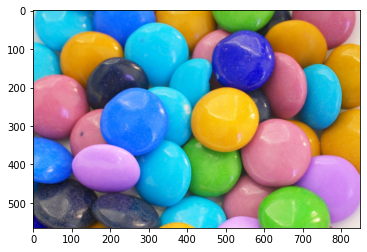



b) Imagem RGB


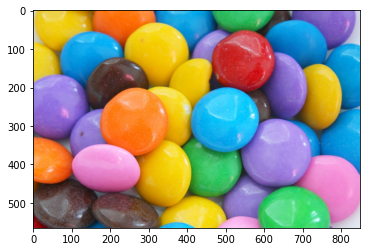



c) Pixels
• (10, 15): [235 203  42]
• (20, 17): [236 204  31]


In [ ]:
import cv2
import matplotlib.pyplot as plt

def showImage(legend, img):
  print(legend)
  plt.imshow(img)
  plt.show()
  print('\n')


# ==+ a) +==
image = cv2.imread('img01.jpg')
showImage('a) Imagem BRG', image)

# ==+ b) +==
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
showImage('b) Imagem RGB', image_rgb)

# ==+ c) +==
print('c) Pixels')
print('• (10, 15):', image_rgb[10, 15])
print('• (20, 17):', image_rgb[20, 17])

----
## Exercício 3

 - a) Abra o arquivo **img02.jpeg** com a biblioteca Opencv, converta para RGB e mostre na tela. 
 - b) Adicione brilho na imagem *original* por meio da soma com um valor constante. Guarde essa nova imagem em uma variável diferente e mostre na tela novamente. 
 - c) Adicione brilho na imagem *original* por meio da multiplicação com um valor constante. Guarde essa nova imagem em uma variável diferente e mostre na tela novamente. 

*Obs 1: antes de fazer as operações de soma e multiplicação com as imagens é necessário converter a imagem para o formato **int**, pois por padrão, a biblioteca Opencv usada o formato **uint8** que limita os valores de 0 até 255.* 

*Obs 2: ao somar ou multiplicar, os valores dos pixels podem ultrapassar o limite aceitável. Portanto, garanta que os valores que passarem do limite de 255 sejam iguais a 255.*

*Obs 3: após fazer as operações de soma e multiplicação, converta o formato dos pixels da imagem para **uint8** novamente.*

a) Imagem RGB


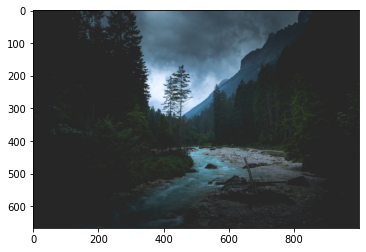



b) Imagem - Operação de soma (+)


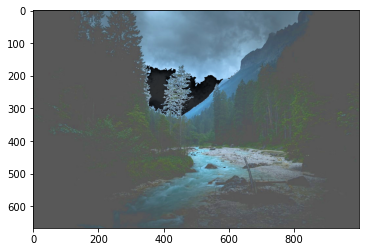



c) Imagem - Operação de multiplicação (*)


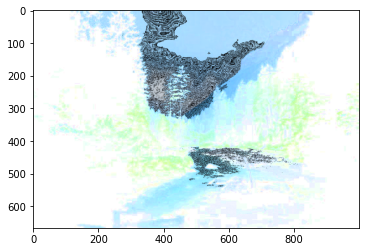

In [32]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def showImage(legend, img):
  print(legend)
  plt.imshow(img)
  plt.show()
  print('\n')


def sumOrMultiply(op, value, img):
  """
    Performs sum or multiplication operation on an image

    ------------
    Parameters:
    ------------
    - op: Operation/option
            0 - Sum
            1 - Multiplication
    - value: Value to be used in the operation chosen
    - img: The image to be manipulated
  """

  image_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
  img_int8 = np.int8(image_hsv)

  for x in range(img_int8.shape[0]):
    for y in range(img_int8.shape[1]):
      h, s, v = img_int8[x][y]
      brightness = v

      if op == 0: brightness = v + value
      elif op == 1: brightness = v * value

      if (brightness > 255): brightness = 255

      img_int8[x][y][2] = brightness

  image_uint8 = np.uint8(img_int8)
  image_bgr = cv2.cvtColor(image_uint8, cv2.COLOR_HSV2BGR)
  return image_bgr


# ==+ a) +==
image = cv2.imread('img02.jpeg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
showImage('a) Imagem RGB', image_rgb)

# ==+ b) +==
image_sum = sumOrMultiply(0, 50, image)
showImage('b) Imagem - Operação de soma (+)', cv2.cvtColor(image_sum, cv2.COLOR_BGR2RGB))

# ==+ c) +==
image_mult = sumOrMultiply(1, 50, image)
showImage('c) Imagem - Operação de multiplicação (*)', cv2.cvtColor(image_mult, cv2.COLOR_BGR2RGB))

----
## Exercício 4

 - a) Crie e plote o histograma das três cores RGB das três imagens do Exercício 3: a imagem original, a imagem com brilho adicionado por soma e a imagem com bilho adicionado por multiplicação.
 - b) Converta as três imagens do Exercício 3 para tons de cinza. Depois, crie e plote os histogramas dos níveis de cinza das imagens. 

In [ ]:
##### Resolva o exercício aqui



----
## Exercício 5

 - a) Abra a imagem *img03.png* usando tons de cinza e mostre na tela. 
 - b) Crie e plote o histograma dessa imagem
 - c) Faça a equalização do histograma da imagem e mostre a imagem na tela.
 - d) Crie e plote o histograma equalizado da imagem.

In [ ]:
##### Resolva o exercício aqui



----
## Exercício 6

 - a) Crie uma matriz usando a biblioteca numpy de tamanho 255 x 128 x 3.
 - b) Transforme essa matriz em uma imagem que corresponda a bandeira do país Tonga.
 
 <img src="bandeira_tonga.png" width="255" height="128" />

In [ ]:
##### Resolva o exercício aqui



----
## Exercício 7

 - Abra a imagem *img04.jpg*, converta para RGB e mostre na tela. 
 - Faça uma operação matricial para recortar a imagem e destacar apenas o cachorro, conforme o exemplo mostrado abaixo 
 - Salve a nova imagem recortada como o nome *img04-recortada.jpg*
 
 <img src="cachorro_zoom.jpg" width="260" height="243" />